<a href="https://colab.research.google.com/github/Sans2326/CUREYA_TASKS/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FRAUD DETECTION USING SOM

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [158]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [159]:
!pip install minisom

In [177]:
data = pd.read_csv('/content/gdrive/MyDrive/csv file/Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [161]:
print(data.dtypes)
print(data.shape)

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object
(690, 16)


In [162]:
data.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


* there are no null values present

In [164]:
# subset creation of independent and dependent variable
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
print("x values\n", X)
print("\ny values\n", Y)

x values
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]

y values
 [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1

In [165]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [166]:
# Training the SOM
#using MiniSom library
from minisom import MiniSom

In [167]:
som.distance_map().shape

(10, 10)

In [168]:
# Training the SOM on data that does not include dependent variable
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)

#Traing SOM on dependent data
som.train_random(data = X, num_iteration = 100)

In [169]:
# visualizing the results 
from pylab import bone, colorbar, pcolor, plot, show, hot

<Figure size 432x288 with 0 Axes>

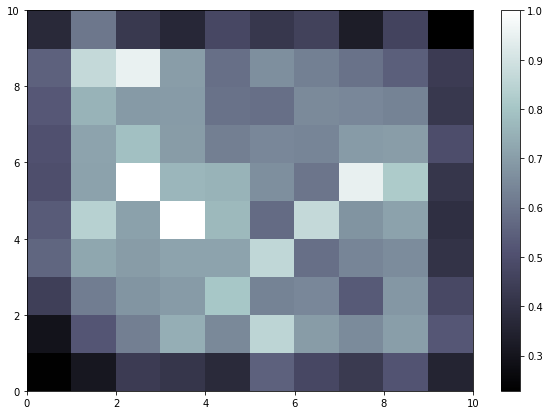

In [170]:
bone()
plt.figure(figsize=(10,7))
pcolor(som.distance_map().T)
colorbar()


* Highest MID is white color and lowest one is represented by dark color. WNs which are far from the general rules are represented by white.To conclude we can say that the WNs with the highest MIDs are the fraud applications

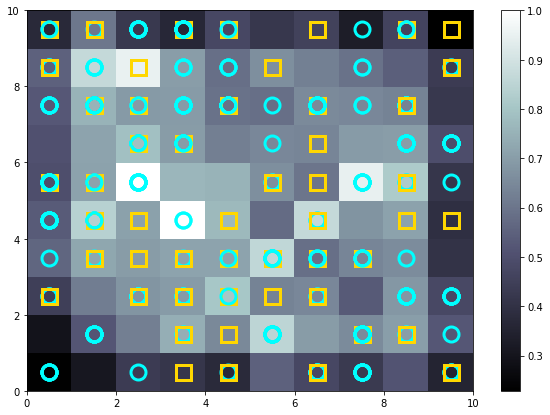

In [171]:
plt.figure(figsize = (10,7))
bone()
pcolor(som.distance_map().T)
colorbar() 

# 'cyan circle' marker will represent customer who didn't get approval and 'yellow square' marker will represnt who did
markers = ['o', 's']
colors = ['cyan', 'gold']

# creating the loop to apply the logic above
for m, n in enumerate(X):          
    wn = som.winner(n)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[y[m]], markeredgecolor = colors[y[m]], markerfacecolor = 'None', markersize=15,
                markeredgewidth = 3)  
    
show()

* Making a list of the cheaters by mapping using the method win_map which returns the dictionary of all the mappings from the WNs to the customers. There are some cheaters who got approval and got away with it (the highest MID having both the markers in it) at the co-ordinate(x=4, y=8)

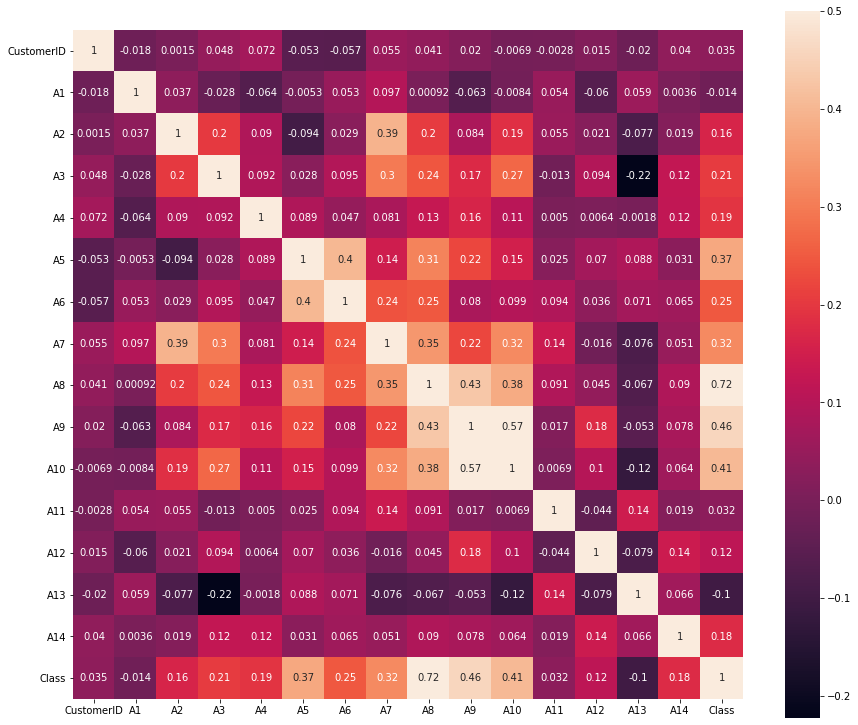

In [172]:
# Correlation matrix
corr = data.corr()
fig = plt.figure(figsize = (15, 13))
sns.heatmap(corr,annot=True, fmt='.2g', square = True, vmax=0.5)
plt.show()

In [179]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(0, 5), (5, 3), (0, 4), (5, 5), (0, 9), (1, 3), (3, 7), (2, 4), (1, 8), (1, 4), (6, 9), (6, 4), (4, 2), (1, 7), (3, 9), (9, 8), (4, 1), (9, 6), (4, 0), (2, 5), (2, 6), (2, 2), (6, 7), (2, 7), (8, 6), (9, 2), (3, 6), (3, 3), (9, 4), (7, 1), (8, 7), (5, 1), (4, 7), (6, 0), (3, 0), (7, 0), (3, 4), (2, 3), (0, 7), (6, 2), (3, 1), (1, 9), (8, 9), (1, 1), (4, 3), (7, 5), (2, 9), (8, 2), (0, 8), (5, 8), (6, 5), (9, 0), (3, 8), (6, 3), (1, 5), (7, 7), (2, 8), (3, 2), (7, 3), (8, 1), (0, 2), (8, 5), (5, 2), (9, 1), (8, 4), (4, 8), (0, 3), (2, 0), (4, 4), (4, 9), (5, 7), (9, 5), (6, 6), (9, 9), (7, 9), (0, 0), (7, 8), (8, 3), (5, 6)])

In [182]:
#frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
frauds = mappings[(4,8)]
np.asarray(frauds).shape

(3, 15)

In [183]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

(3, 15)

In [184]:
frauds

array([[1.5793317e+07, 1.0000000e+00, 2.1080000e+01, 1.0085000e+01,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0000000e+00],
       [1.5636626e+07, 1.0000000e+00, 6.2750000e+01, 7.0000000e+00,
        2.0000000e+00, 1.0000000e+01, 9.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.3000000e+01],
       [1.5729377e+07, 1.0000000e+00, 1.8170000e+01, 1.0250000e+01,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 1.0850000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 1.4000000e+01]])

In [185]:
df_frauds = pd.DataFrame(frauds)
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15793317.0,1.0,21.08,10.085,1.0,10.0,8.0,1.250,0.0,0.0,0.0,0.0,2.0,260.0,1.0
1,15636626.0,1.0,62.75,7.000,2.0,10.0,9.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,13.0
2,15729377.0,1.0,18.17,10.250,2.0,8.0,8.0,1.085,0.0,0.0,0.0,0.0,2.0,320.0,14.0


* 
Conclusion: We got the Customer IDs of the fraudsters and a list of 3 such people.